# __Text Classification using RNN__

Let's see how to classify the text using RNN (Recurrent Neural Network).

In [11]:
# pip3 install nltk
import nltk

In [12]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/xyz-
[nltk_data]     ai/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Steps to be followed:

1. Import the libraries
2. Define the hyperparameter
3. Preprocess the data and print the lengths of the labels and article lists
4. Split the data into training and validation sets
5. Initialize a tokenizer and fit it to the training articles
6. Convert the training articles into sequences using the tokenizer
7. Pad the sequence
8. Print the length of validation sequences and the shape of validation padded
9. Train the model
10. Compile the model
11. Plot the graph

### Step 1: Import the libraries
- Import the required libraries

In [13]:
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
import matplotlib.pyplot as plt


In [14]:
STOPWORDS

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

### Step 2: Define the hyperparameter
- Set the value of __vocab_size__ to __5000__, representing the size of the vocabulary.
- Set the value of __embedding_dim__ to __64__, specifying the dimensionality of the word embeddings.
- Set the value of __max_length__ to __200__, indicating the maximum length of input sequences.
- Set the value of __padding_type__ to __post__, specifying that padding should be added at the end of sequences.
- Set the value of __trunc_type__ to __post__, indicating that truncation should be applied at the end of sequences.
- Set the value of __oov_tok__ to __OOV__, representing the token to be used for out-of-vocabulary words.
- Set the value of __training_portion__ to __0.8__, representing the proportion of data to be used for training.

In [15]:
vocab_size = 5000
embedding_dim = 64
max_length = 200
padding_type = 'post'
trunc_type = 'post'
oov_tok = '<OOV>'
training_portion = .8

### Step 3: Preprocess the data and print the lengths of the labels and articles lists

- Define two empty lists, articles, and labels to store the articles and labels, respectively.
- Read the contents of the **bbc-text.csv** file using csv.reader and iterate through each row.
- Extract the labels from the first column of each row and append it to the labels list.
- Process the article from the second column by removing stopwords and replacing consecutive spaces with a single space, and then append it to the article list.
- Print the lengths of the labels and article lists to display the number of labels and processed articles, respectively.

In [16]:
print(STOPWORDS)

{'yours', "she'll", 'shouldn', "mustn't", 'these', 'were', 'they', 'through', 'wasn', "that'll", 'so', "shan't", "he's", 'ma', "hasn't", "we'd", "weren't", 'myself', 'to', 'both', "isn't", 'under', 'here', 'not', 'if', 'any', 'be', 'at', 'do', 'why', "i'm", 'too', 'a', 'against', "wouldn't", 'for', "i'll", 'aren', 'y', "they'd", 'most', 'needn', 'no', 'isn', 'this', "hadn't", "haven't", 'as', 'own', "it'd", 'how', "doesn't", 'from', 'shan', 'yourself', 've', 'been', 'doesn', 'had', 'its', 'mustn', 're', "wasn't", 'into', 'same', "didn't", 'the', 'below', 'i', 'wouldn', 'our', 'your', 'again', 'me', 'did', 's', 'above', 'there', 't', "couldn't", 'will', 'll', 'herself', 'haven', 'after', 'until', "don't", 'on', 'should', 'was', 'very', 'whom', 'before', 'my', "you're", "needn't", 'he', 'themselves', 'where', "they've", "we're", 'all', "i've", 'don', 'his', 'now', "it's", 'have', "aren't", 'because', 'just', 'out', "should've", 'can', 'that', "you'd", 'is', 'm', 'having', 'off', 'yoursel

In [17]:
articles = []
labels = []

with open("./data/bbc-text.csv", 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        labels.append(row[0])
        article = row[1]
        for word in STOPWORDS:
            token = ' ' + word + ' '
            article = article.replace(token, ' ')
            article = article.replace(' ', ' ')
        articles.append(article)
print(len(labels))
print(len(articles))

2225
2225


<br>

__Article number 9 BEFORE removing the stop words:__

In [18]:
with open("./data/bbc-text.csv", 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    i=0
    for row in reader:
        article = row[1]
        if (i==9): print(article)
        i=i+1

last star wars  not for children  the sixth and final star wars movie may not be suitable for young children  film-maker george lucas has said.  he told us tv show 60 minutes that revenge of the sith would be the darkest and most violent of the series.  i don t think i would take a five or six-year-old to this   he told the cbs programme  to be aired on sunday. lucas predicted the film would get a us rating advising parents some scenes may be unsuitable for under-13s. it opens in the uk and us on 19 may. he said he expected the film would be classified pg-13 - roughly equivalent to a british 12a rating.  the five previous star wars films have all carried less restrictive pg - parental guidance - ratings in the us. in the uk  they have all been passed u - suitable for all - with the exception of attack of the clones  which got a pg rating in 2002. revenge of the sith - the third prequel to the original 1977 star wars film - chronicles the transformation of the heroic anakin skywalker in

<br>

__Article number 9 AFTER removing the stop words:__

In [19]:
print(articles[9])

last star wars  children  sixth final star wars movie may suitable young children  film-maker george lucas said.  told us tv show 60 minutes revenge sith would darkest violent series.  think would take five six-year-old   told cbs programme  aired sunday. lucas predicted film would get us rating advising parents scenes may unsuitable under-13s. opens uk us 19 may. said expected film would classified pg-13 - roughly equivalent british 12a rating.  five previous star wars films carried less restrictive pg - parental guidance - ratings us. uk  passed u - suitable - exception attack clones  got pg rating 2002. revenge sith - third prequel original 1977 star wars film - chronicles transformation heroic anakin skywalker evil darth vader travels hell-like planet composed erupting volcanoes molten lava.  going watch make pact devil   lucas said.  film much dark  emotional. much tragedy.


In [20]:
print(labels[9])

entertainment


__We just saw one example of input (article 9) and target (category "entertainment").__

__Observations:__
- There are only **2,225** articles in the data.
- Then, we split into a training set and validation set, according to the parameter we set earlier, 80% for training, and 20% for validation.

In [21]:
len(articles)

2225

Each element of the list "articles" is an article.

In [22]:
articles[0]

'tv future hands viewers home theatre systems  plasma high-definition tvs  digital video recorders moving living room  way people watch tv radically different five years  time.  according expert panel gathered annual consumer electronics show las vegas discuss new technologies impact one favourite pastimes. us leading trend  programmes content delivered viewers via home networks  cable  satellite  telecoms companies  broadband service providers front rooms portable devices.  one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes  like us tivo uk sky+ system  allow people record  store  play  pause forward wind tv programmes want.  essentially  technology allows much personalised tv. also built-in high-definition tv sets  big business japan us  slower take europe lack high-definition programming. people forward wind adverts  also forget abiding network channel schedules  putting together a-la-carte entertainment. us networks cable satellite companies

In [23]:
labels[0]

'tech'

In [24]:
articles[1]

'worldcom boss  left books alone  former worldcom boss bernie ebbers  accused overseeing $11bn (£5.8bn) fraud  never made accounting decisions  witness told jurors.  david myers made comments questioning defence lawyers arguing mr ebbers responsible worldcom problems. phone company collapsed 2002 prosecutors claim losses hidden protect firm shares. mr myers already pleaded guilty fraud assisting prosecutors.  monday  defence lawyer reid weingarten tried distance client allegations. cross examination  asked mr myers ever knew mr ebbers  make accounting decision  .  aware   mr myers replied.  ever know mr ebbers make accounting entry worldcom books   mr weingarten pressed.    replied witness. mr myers admitted ordered false accounting entries request former worldcom chief financial officer scott sullivan. defence lawyers trying paint mr sullivan  admitted fraud testify later trial  mastermind behind worldcom accounting house cards.  mr ebbers  team  meanwhile  looking portray affable bos

In [25]:
labels[1]

'business'

### Step 4: Split the data into training and validation sets
- Calculate the **train_size** by multiplying the length of the article list with __training_portion__ and converting it to an integer.
- Create **train_articles** by slicing the article list from index **0** to **train_size.**
- Create **train_labels** by slicing the labels list from index **0** to **train_size.**
- Create validation_articles by slicing the articles list from **train_size** onward.
- Create **validation_labels** by slicing the labels list from **train_size** onward.
- Print the **train_size** to display the calculated value.

- The lengths of **train_articles**, **train_labels**, **validation_articles**, and **validation_labels** represent the number of items in each list.

In [26]:
train_size = int(len(articles) * training_portion)
train_size

1780

In [27]:
train_articles = articles[0: train_size]
train_labels = labels[0: train_size]

validation_articles = articles[train_size:]
validation_labels = labels[train_size:]

print(train_size)
print(len(train_articles))
print(len(train_labels))
print(len(validation_articles))
print(len(validation_labels))

1780
1780
1780
445
445


__Observations:__
- The value of **train_size** is calculated based on the proportion of training data.
- The lengths of **train_articles**, **train_labels**, **validation_articles**, and **validation_labels** representing the number of items in each list.

### Step 5: Initialize a tokenizer and fit it to the training articles

- Initialize a **Tokenizer** object named tokenizer with the specified parameters: **num_words** representing the vocabulary size and **oov_token** representing the out-of-vocabulary token.
- Fit the tokenizer on the training articles **(train_articles)** using the **fit_on_texts** method.
- This step updates the tokenizer's internal word index based on the words in the training articles.
- Assign the word index obtained from the tokenizer to the variable **word_index.**
- Extract the first 10 items from the word_index dictionary
- Print the resulting dictionary.

In [28]:
vocab_size=5000
oov_tok = '<OOV>'

# Declare tokenizer
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)

In [29]:
# Fit tokenizer
tokenizer.fit_on_texts(train_articles)

In [30]:
word_index = tokenizer.word_index
word_index

{'<OOV>': 1,
 'said': 2,
 'mr': 3,
 'would': 4,
 'year': 5,
 'also': 6,
 'people': 7,
 'new': 8,
 'us': 9,
 'one': 10,
 'could': 11,
 'last': 12,
 'first': 13,
 'time': 14,
 'two': 15,
 'government': 16,
 'world': 17,
 'uk': 18,
 'best': 19,
 'years': 20,
 'make': 21,
 'film': 22,
 'told': 23,
 'made': 24,
 'get': 25,
 'music': 26,
 'game': 27,
 'like': 28,
 'back': 29,
 'many': 30,
 '000': 31,
 'labour': 32,
 'three': 33,
 'well': 34,
 '1': 35,
 'next': 36,
 'bbc': 37,
 'take': 38,
 'set': 39,
 'number': 40,
 'added': 41,
 'way': 42,
 'market': 43,
 '2': 44,
 'company': 45,
 'may': 46,
 'says': 47,
 'election': 48,
 'home': 49,
 'party': 50,
 'good': 51,
 'going': 52,
 'much': 53,
 'work': 54,
 '2004': 55,
 'still': 56,
 'win': 57,
 'show': 58,
 'think': 59,
 'games': 60,
 'go': 61,
 'top': 62,
 'second': 63,
 'million': 64,
 '6': 65,
 'england': 66,
 'firm': 67,
 'since': 68,
 'week': 69,
 'say': 70,
 'play': 71,
 'part': 72,
 'public': 73,
 'use': 74,
 'blair': 75,
 '3': 76,
 'want'

In [31]:
dict(list(word_index.items())[0:20])

{'<OOV>': 1,
 'said': 2,
 'mr': 3,
 'would': 4,
 'year': 5,
 'also': 6,
 'people': 7,
 'new': 8,
 'us': 9,
 'one': 10,
 'could': 11,
 'last': 12,
 'first': 13,
 'time': 14,
 'two': 15,
 'government': 16,
 'world': 17,
 'uk': 18,
 'best': 19,
 'years': 20}

__Observations:__
- The code prints a dictionary containing the first 10 items from the word_index dictionary.
- These items represent a subset of the word-to-index mappings generated by the tokenizer.

### Step 6: Convert the Training Articles into Sequences Using the Tokenizer
- Convert the training articles **(train_articles)** into sequences using the **texts_to_sequences** method of the tokenizer object and assign the result to **train_sequences**
- Print the sequence representation of the 10th training article (index 9) by accessing **train_sequences[10]**

In [32]:
print(train_articles[9])

last star wars  children  sixth final star wars movie may suitable young children  film-maker george lucas said.  told us tv show 60 minutes revenge sith would darkest violent series.  think would take five six-year-old   told cbs programme  aired sunday. lucas predicted film would get us rating advising parents scenes may unsuitable under-13s. opens uk us 19 may. said expected film would classified pg-13 - roughly equivalent british 12a rating.  five previous star wars films carried less restrictive pg - parental guidance - ratings us. uk  passed u - suitable - exception attack clones  got pg rating 2002. revenge sith - third prequel original 1977 star wars film - chronicles transformation heroic anakin skywalker evil darth vader travels hell-like planet composed erupting volcanoes molten lava.  going watch make pact devil   lucas said.  film much dark  emotional. much tragedy.


## This will convert each article into a sequence of numbers.

In [33]:
train_sequences  = tokenizer.texts_to_sequences(train_articles)

In [34]:
print(train_sequences[9])

[12, 207, 2723, 283, 1969, 140, 207, 2723, 586, 46, 4116, 430, 283, 22, 1158, 1236, 4513, 2, 23, 9, 91, 58, 1143, 389, 1, 1, 4, 1, 1, 330, 59, 4, 38, 85, 99, 5, 100, 23, 4993, 345, 1, 324, 4513, 1038, 22, 4, 25, 9, 3274, 1, 1063, 3066, 46, 1, 2431, 1, 2569, 18, 9, 881, 46, 2, 94, 22, 4, 1, 1, 640, 1, 2974, 86, 1, 3274, 85, 488, 207, 2723, 319, 1824, 277, 1, 1, 1, 3793, 2724, 9, 18, 1908, 4734, 4116, 1, 715, 1, 166, 1, 3274, 601, 1, 1, 145, 1, 827, 1, 207, 2723, 22, 1, 1, 1, 1, 1, 4735, 1, 1, 1, 4736, 28, 1, 1, 1, 1, 1, 1, 52, 893, 21, 3393, 1, 4513, 2, 22, 53, 3169, 4117, 53, 3794]


__Observation:__
- The code prints the sequence representation of the 10th training article (index 9) in the **train_sequences** list.
- The output is a list of integers, where each integer represents the index of a word in the tokenizer's word index vocabulary that corresponds to a word in the article.

### Step 7: Pad the Sequence
- Pad the sequences in **train_sequences** using the **pad_sequences** function
- Set the maximum length of the padded sequences to **max_length**
- Specify the padding type as **padding_type** and the truncation type as **trunc_type**
- Assign the padded sequences to the variable **train_padded**

In [35]:
max_length = 200
trunc_type='post'
train_padded = pad_sequences(train_sequences, maxlen=200, padding=padding_type, truncating='post')

In [36]:
print(train_padded[9])

[  12  207 2723  283 1969  140  207 2723  586   46 4116  430  283   22
 1158 1236 4513    2   23    9   91   58 1143  389    1    1    4    1
    1  330   59    4   38   85   99    5  100   23 4993  345    1  324
 4513 1038   22    4   25    9 3274    1 1063 3066   46    1 2431    1
 2569   18    9  881   46    2   94   22    4    1    1  640    1 2974
   86    1 3274   85  488  207 2723  319 1824  277    1    1    1 3793
 2724    9   18 1908 4734 4116    1  715    1  166    1 3274  601    1
    1  145    1  827    1  207 2723   22    1    1    1    1    1 4735
    1    1    1 4736   28    1    1    1    1    1    1   52  893   21
 3393    1 4513    2   22   53 3169 4117   53 3794    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

__Observation:__
- The code prints the padded sequence representation of the 11th training article.
- The output is a list of integers representing the word indices of the corresponding words in the article, after applying padding to ensure a consistent length (max_length) for all sequences.

### Step 8: Print the Length of Validation Sequences and the Shape of Validation Padded
- Convert the validation articles into sequences using the tokenizer and pad the sequences to a maximum length. Assign the result to **validation_padded**
- Print the length of **validation_sequences** and the shape of **validation_padded**
- Create a tokenizer for the labels and fit it on the labels list
- Convert the training and validation labels into sequences using the label tokenizer and store the results in **training_label_seq** and **validation_label_seq** as NumPy arrays

## Next, encode and pad the validation samples.

In [37]:
validation_sequences = tokenizer.texts_to_sequences(validation_articles)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(len(validation_sequences))
print(validation_padded.shape)

445
(445, 200)


__Observations:__
- The length of **validation_sequences**, indicating the number of sequences in the validation set.
- The shape of **validation_padded**, representing the dimensions of the padded validation sequences.

In [38]:
print(set(labels))

{'politics', 'entertainment', 'sport', 'tech', 'business'}


__Observation:__
- The output is a set containing the unique labels: 'business', 'tech', 'entertainment', 'politics', and 'sport'.

Five labels total.

In [39]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)

In [40]:
label_tokenizer.word_index

{'sport': 1, 'business': 2, 'politics': 3, 'tech': 4, 'entertainment': 5}

In [41]:
for key in label_tokenizer.word_index.keys():
  label_tokenizer.word_index[key] = label_tokenizer.word_index[key] -1

In [42]:
label_tokenizer.word_index

{'sport': 0, 'business': 1, 'politics': 2, 'tech': 3, 'entertainment': 4}

In [43]:
training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))

In [44]:
training_label_seq[:12]

array([[3],
       [1],
       [0],
       [0],
       [4],
       [2],
       [2],
       [0],
       [0],
       [4],
       [4],
       [1]])

__Observations:__
- The output of this code is the conversion of label sequences for the training and validation sets.
- The **training_label_seq** and **validation_label_seq** are NumPy arrays containing the label sequences for the respective sets, based on the word index mapping generated by the **label_tokenizer**

### Step 9-A: Create the Model
- Create a sequential model using **tf.keras.Sequential()**
- Add an embedding layer to the model with the specified vocabulary size **(vocab_size)** and embedding dimension **(embedding_dim=64)**
- Add a SimpleRNN layer to the model with output of 96 nodes
- Add a dense layer to the model with 64 as the number of units and **relu** activation function
- Add a dense layer with 5 units and the **softmax** activation function to the model
- Print a summary of the model's architecture using **model.summary()**

In [45]:
vocab_size = 5000
embedding_dim=64

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedding_dim,input_shape=[200]),
    tf.keras.layers.SimpleRNN(units=96,activation='tanh'),
    tf.keras.layers.Dense(units=64,activation='relu'),
    tf.keras.layers.Dense(units=5,activation='softmax')
])

model.summary()

/Users/xyz-ai/Developer/python3-code/ml/.venv/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:100: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 200, 64)        │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ (None, 96)             │        15,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 341,989 (1.30 MB)

 Trainable params: 341,989 (1.30 MB)

 Non-trainable params: 0 (0.00 B)

__Observation:__
- The code outputs a summary of the model's architecture, including the number of parameters and the shape of each layer in the model.

### Step 9-B: Create the Model
- Create a sequential model using **tf.keras.Sequential()**
- Add an embedding layer to the model with the specified vocabulary size **(vocab_size)** and embedding dimension **(embedding_dim=64)**
- Add a bidirectional SimpleRNN layer to the model with output of 96 nodes
- Add a dense layer to the model with 64 as the number of units and **relu** activation function
- Add a dense layer with 5 units and the **softmax** activation function to the model
- Print a summary of the model's architecture using **model.summary()**

In [46]:
vocab_size = 5000
embedding_dim=64

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedding_dim,input_shape=[200]),
    tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(units=96,activation='tanh')),
    tf.keras.layers.Dense(units=64,activation='relu'),
    tf.keras.layers.Dense(units=5,activation='softmax')
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 200, 64)        │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 192)            │        30,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 363,589 (1.39 MB)

 Trainable params: 363,589 (1.39 MB)

 Non-trainable params: 0 (0.00 B)

### Step 10: Compile and train the Model
- Compile the model using **model.compile()** with the loss function set to **sparse_categorical_crossentropy**, the optimizer set to **adam**, and the metrics set to **accuracy**
- Set the number of epochs to 10
- Train the model using **model.fit()** with the training padded sequences **(train_padded)** and training label sequences **(training_label_seq)**
- Specify the number of epochs as **num_epochs**, the validation data as the validation padded sequences **(validation_padded)** and validation label sequences **(validation_label_seq)**, and **verbose** mode as **2**

In [47]:

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

num_epochs = 10

history = model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq), verbose=2)


Epoch 1/10
56/56 - 2s - 35ms/step - accuracy: 0.2629 - loss: 1.5671 - val_accuracy: 0.2697 - val_loss: 1.5303
Epoch 2/10
56/56 - 1s - 19ms/step - accuracy: 0.2685 - loss: 1.5754 - val_accuracy: 0.2427 - val_loss: 1.5901
Epoch 3/10
56/56 - 1s - 21ms/step - accuracy: 0.3073 - loss: 1.5495 - val_accuracy: 0.2472 - val_loss: 1.5749
Epoch 4/10
56/56 - 1s - 21ms/step - accuracy: 0.2949 - loss: 1.5314 - val_accuracy: 0.3820 - val_loss: 1.4903
Epoch 5/10
56/56 - 1s - 22ms/step - accuracy: 0.2949 - loss: 1.5361 - val_accuracy: 0.2562 - val_loss: 1.5427
Epoch 6/10
56/56 - 1s - 21ms/step - accuracy: 0.3320 - loss: 1.5275 - val_accuracy: 0.3483 - val_loss: 1.5009
Epoch 7/10
56/56 - 1s - 22ms/step - accuracy: 0.3534 - loss: 1.4442 - val_accuracy: 0.3371 - val_loss: 1.4905
Epoch 8/10
56/56 - 1s - 21ms/step - accuracy: 0.4096 - loss: 1.3757 - val_accuracy: 0.4247 - val_loss: 1.3844
Epoch 9/10
56/56 - 1s - 23ms/step - accuracy: 0.5230 - loss: 1.1885 - val_accuracy: 0.5528 - val_loss: 1.1520
Epoch 10/1

__Observations:__
- The code trains the model for the specified number of epochs and records the training and validation accuracy and loss metrics.
- The output is an object named history that contains information about the training process, such as the loss and accuracy values at each epoch.

### Step 11: Plot the Graph
- Define a function named **plot_graphs** that takes history and string as inputs. Inside the function, plot the training and validation values of the given metric (string) from the history object using **plt.plot()**
- Set the x-axis label as **Epochs** and the y-axis label as the given metric (string)
- Call the **plot_graphs** function twice, first with **history** and **accuracy** as arguments, and then with **history** and **loss** as arguments
- Display the generated plots showing the training and validation values of the accuracy and loss metrics over the epochs

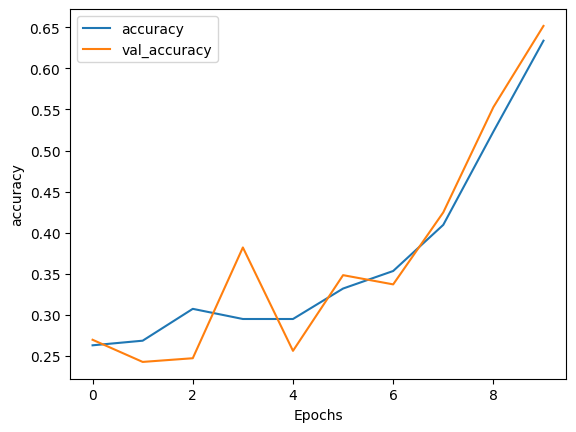

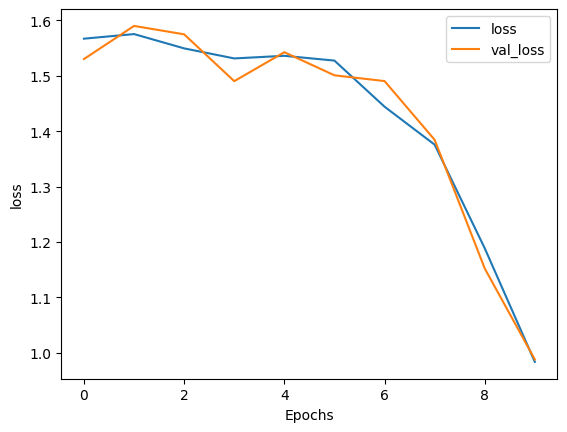

In [48]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

<br>

__Make predictions__

In [49]:
predictions= model.predict(validation_padded)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


Each prediction is a softmax vector of 5 categories.

In [50]:
predictions

array([[4.6608964e-01, 4.3963168e-02, 3.2536469e-02, 6.5737413e-03,
        4.5083714e-01],
       [5.7919972e-02, 8.3912957e-01, 2.0037314e-04, 3.3035252e-02,
        6.9714837e-02],
       [9.0967834e-02, 2.0664679e-03, 8.1542653e-01, 9.3066962e-03,
        8.2232416e-02],
       ...,
       [4.9279678e-01, 3.2412495e-02, 3.8260091e-02, 4.7891806e-03,
        4.3174151e-01],
       [1.0984745e-01, 3.0530063e-03, 7.5678742e-01, 1.0489182e-02,
        1.1982306e-01],
       [6.1026168e-01, 5.5678513e-02, 2.6821006e-02, 2.0711450e-02,
        2.8652737e-01]], dtype=float32)

In [51]:
predictions[0]

array([0.46608964, 0.04396317, 0.03253647, 0.00657374, 0.45083714],
      dtype=float32)

In [52]:
ind =10
print("Sentence = ",validation_articles[ind])
print(" ")
print("Exact = ",validation_label_seq[ind][0], ":",label_tokenizer.sequences_to_texts([(validation_label_seq[ind]+1).tolist()])[0])
print("Predicted = ",np.argmax(predictions[ind]), ":",label_tokenizer.sequences_to_texts([[np.argmax(predictions[ind])+1]])[0])

Sentence =  brown names 16 march budget chancellor gordon brown deliver budget house commons 16 march  treasury announced.  budget  likely last general election  1230 gmt wednesday  prime minister question time. annual event chancellor outlines government taxation broader economic predictions. likely set much tax spending battleground election  widely expected 5 may.  next month budget mr brown eighth since labour came power 1997. may election called  could little 18 days budget announcement date election. shortened finance bill would rushed parliament all-party support allow government continue collecting revenue. full finance bill  budget measures  would returned commons election  labour secures another term office. mr brown announced budget date short ministerial statement  accountancy firm ernst & young urged put politics aside focus long-term requirements economy.  budgets given immediately last six elections  taxes cut incumbent chancellor  many cases  taxes increased soon electi

In [53]:
ind =80
print("Sentence = ",validation_articles[ind])
print(" ")
print("Exact = ",validation_label_seq[ind][0], ":",label_tokenizer.sequences_to_texts([(validation_label_seq[ind]+1).tolist()])[0])
print("Predicted = ",np.argmax(predictions[ind]), ":",label_tokenizer.sequences_to_texts([[np.argmax(predictions[ind])+1]])[0])

Sentence =  leeds v saracens (fri) headingley  friday  25 february  2000 gmt  tykes brought newcastle prop ed kalman tom mcgee borders loan fly-half craig mcmullen joined narbonne. raphael ibanez named hooker saracens one four changes. simon raiwalui ben russell also selected pack kevin sorrell comes outside centre.  - friday game headingley got go-ahead friday passing early pitch inspection. leeds: balshaw; rees  christophers  bell  doherty; mcmullen  dickens; mcgee  rawlinson  gerber; murphy  palmer (capt)  morgan  parks  popham. replacements: kalman  regan  hyde  rigney  mcmillan  rock  vickerman. saracens: bartholomeusz; castaignede  sorrell  harris  vaikona; jackson  bracken; yates  ibanez  visagie; raiwalui  fullarton; randell  russell  vyvyan (capt). replacements: cairns  lloyd  broster  chesney  johnston  rauluni  little.
 
Exact =  0 : sport
Predicted =  0 : sport


In [54]:
ind =11
print("Sentence = ",validation_articles[ind])
print(" ")
print("Exact = ",validation_label_seq[ind][0], ":",label_tokenizer.sequences_to_texts([(validation_label_seq[ind]+1).tolist()])[0])
print("Predicted = ",np.argmax(predictions[ind]), ":",label_tokenizer.sequences_to_texts([[np.argmax(predictions[ind])+1]])[0])

Sentence =  choose hope fear - kennedy voters clear choice politics fear politics hope next general election  said charles kennedy.  new year message liberal democrat leader said labour conservatives united relying fear  populist scares . said party one hope ready 2005 poll. asian tsunami said  heartening  learn generosity shown britons. mr kennedy said thoughts caught disaster  dominated christmas new year period. home said many people turning liberal democrats became disheartened politics two main parties.  general election would three-party struggle  conservative party  fades away  national force liberal democrats challenge labour heartlands  said.  clear division emerging british politics - politics fear versus politics hope.  labour counting politics fear  ratcheting talk threats  crime insecurity. conservatives re-working populist scares asylum european  menace    said. said government using climate fear try strip away civil liberties.  already using detention without trial belma

In [55]:
ind =100
print("Sentence = ",validation_articles[ind])
print(" ")
print("Exact = ",validation_label_seq[ind][0], ":",label_tokenizer.sequences_to_texts([(validation_label_seq[ind]+1).tolist()])[0])
print("Predicted = ",np.argmax(predictions[ind]), ":",label_tokenizer.sequences_to_texts([[np.argmax(predictions[ind])+1]])[0])

Sentence =  doors open biggest gadget fair thousands technology lovers industry experts gathered las vegas annual consumer electronics show (ces).  fair showcases latest technologies gadgets hit shops next year. 50 000 new products unveiled show unfolds. microsoft chief bill gates make pre-show keynote speech wednesday expected announce details next generation xbox.  thrust year show technologies put people charge multimedia content store  listen  watch want devices time  anywhere. 120 000 people expected attend trade show stretches 1.5 million square feet. highlights include latest trends digital imaging  storage technologies  thinner flat screen high-definition tvs  wireless portable technologies  gaming  broadband technologies. show also includes several speeches key technology companies intel  microsoft  hewlett packard among others.  story year remains digital completely transforming revolutionising products way people interact   jeff joseph  consumer electronics association (cea)